In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
clerkship_data =  pd.read_excel('./dataset.xlsx', sheet_name=0)

In [3]:
clerkship_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   FAM 7100 Attempt# 1  913 non-null    int64
 1   INT 7200 Attempt# 1  913 non-null    int64
 2   NEU 7700 Attempt# 1  913 non-null    int64
 3   OBS 7600 Attempt# 1  913 non-null    int64
 4   PED 7300 Attempt# 1  913 non-null    int64
 5   PSY 7500 Attempt# 1  913 non-null    int64
 6   SUR 7400 Attempt# 1  913 non-null    int64
 7   CCSE_score           913 non-null    int64
 8   3-dgt score          913 non-null    int64
dtypes: int64(9)
memory usage: 64.3 KB


In [39]:
clerkship_data.dtypes

FAM 7100 Attempt# 1    int64
INT 7200 Attempt# 1    int64
NEU 7700 Attempt# 1    int64
OBS 7600 Attempt# 1    int64
PED 7300 Attempt# 1    int64
PSY 7500 Attempt# 1    int64
SUR 7400 Attempt# 1    int64
CCSE_score             int64
3-dgt score            int64
dtype: object

In [40]:
clerkship_data.describe()

,FAM 7100 Attempt# 1,INT 7200 Attempt# 1,NEU 7700 Attempt# 1,OBS 7600 Attempt# 1,PED 7300 Attempt# 1,PSY 7500 Attempt# 1,SUR 7400 Attempt# 1,CCSE_score,3-dgt score
count,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,75.286966,74.054765,79.521358,77.922234,77.979189,84.691128,73.995619,218.853231,244.272727
std,7.276254,9.210219,7.596588,7.554588,8.383137,5.723422,9.175792,24.513922,15.718434
min,1.000000,4.000000,58.000000,51.000000,0.000000,58.000000,14.000000,53.000000,197.000000
25%,70.000000,68.000000,74.000000,73.000000,73.000000,81.000000,68.000000,205.000000,234.000000
50%,76.000000,75.000000,80.000000,78.000000,79.000000,85.000000,74.000000,220.000000,246.000000
75%,80.000000,81.000000,85.000000,84.000000,84.000000,89.000000,81.000000,236.000000,256.000000
max,94.000000,94.000000,97.000000,96.000000,96.000000,97.000000,94.000000,272.000000,279.000000


<AxesSubplot:>

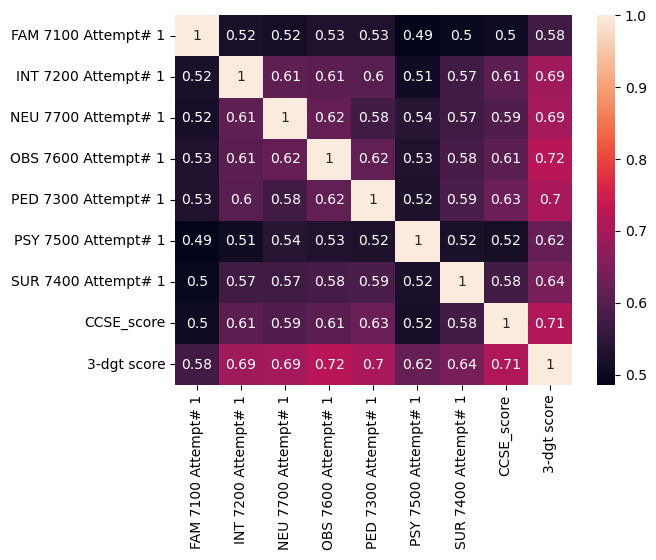

In [41]:
sns.heatmap(clerkship_data.corr(), annot = True)

## Selection of multiple dependent vairiables and independent variable for regression

In [19]:
X = clerkship_data.drop(['3-dgt score'], axis=1)

y = clerkship_data['3-dgt score']

## Training of data to make accurate prediction of independent variable 

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

## Linear regression as 'model' function

In [21]:
model = LinearRegression().fit(X_train, y_train)

In [22]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((684, 8), (684,), (229, 8), (229,))

## Coefficient of determination (𝑅²) explains which amount of variation in 𝑦 can be explained by the dependence on 𝐱, using regression model. A larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.

In [23]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7316181693626653


## Intercept illustrates model prediction of CK score when 𝑥 (clerkship grades) are zero. 

In [24]:
c = model.intercept_
print(f"intercept: {c}")

intercept: 75.55901115111922


## The estimated slope(𝑏₁) means that the predicted CK score rises by 𝑏₁ when 𝑥 is increased by one. 

In [25]:
m = model.coef_
print(f"slope: {m}")

slope: [0.10917392 0.26439995 0.26454643 0.44189883 0.31565463 0.32344074
 0.10539012 0.11684433]


In [26]:
y_train_prediction = model.predict(X_train)
X_train.shape, y_train_prediction.shape

((684, 8), (684,))

In [27]:
y_test_prediction = model.predict(X_test)
X_test.shape, y_test_prediction.shape

((229, 8), (229,))

## Visulization of training data & testing data

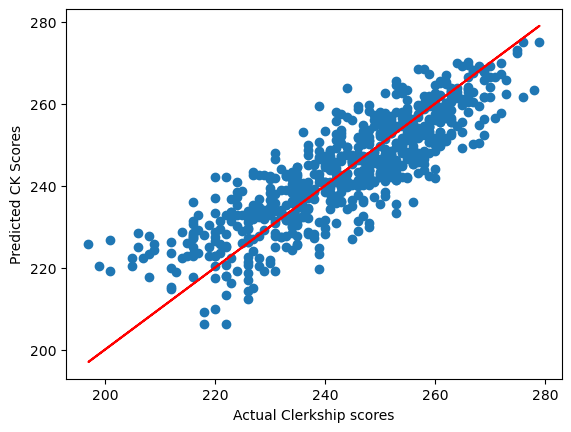

In [28]:
plt.scatter(y_train, y_train_prediction)
plt.xlabel("Actual Clerkship scores")
plt.ylabel("Predicted CK Scores")
plt.plot(y_train, y_train, color ='r')
plt.show()

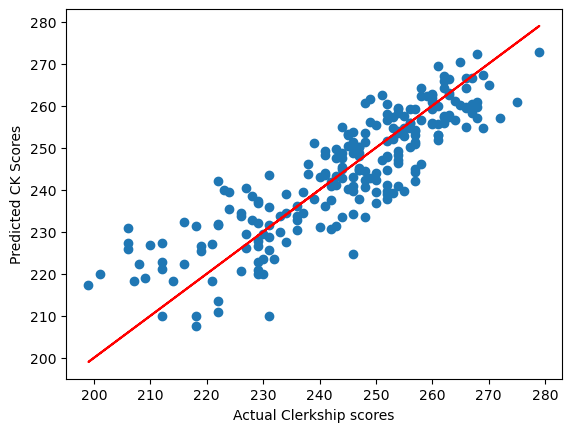

In [29]:
plt.scatter(y_test, y_test_prediction)
plt.xlabel("Actual Clerkship scores")
plt.ylabel("Predicted CK Scores")
plt.plot(y_test, y_test, color ='r')
plt.show()

# OLS Regression

In [30]:
x_OLS = sm.add_constant(X)

OLSmodel = sm.OLS(y,x_OLS).fit()
predicts = OLSmodel.predict(x_OLS)

### Consider p-value < 0.05 for a certain variable then it is significant and has some relationship with predictor.


In [31]:
print(OLSmodel.summary())

                            OLS Regression Results                            
Dep. Variable:            3-dgt score   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     316.1
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          7.51e-256
Time:                        16:13:57   Log-Likelihood:                -3201.1
No. Observations:                 913   AIC:                             6420.
Df Residuals:                     904   BIC:                             6463.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  74.4392    

## Variance Inflation Factor 
### Used to meet assumption of multicolinearity 

In [32]:
# VIF = variance inflation factor = 1/(1-R^2)

def vif(clerkship_data):
    # initialize empty dictionaries 
    vif_dict, tolerance_dict = {},{}
        
    #form input data for each variable 
    for col in clerkship_data:
        y = clerkship_data[col]
        X = clerkship_data.drop(columns=[col])

        #extract r-squared from model
        r2 = LinearRegression().fit(X, y).score(X,y)

        #calc VIF
        if r2 < 1: #Prevent division by zero runtime error
            vif = 1/(1 - r2)
        else:
            vif = 100
        vif_dict[col] = vif

        #calculate tolerance
        tolerance = 1 - r2
        tolerance_dict[col] = tolerance

        #generate dataframe
        clerkship_data_output = pd.DataFrame({'VIF': vif_dict, 'Tolerance':tolerance_dict})
    return clerkship_data_output.sort_values(by=['VIF'], ascending =False)
vif(X)            

#Used to meet assumption of multicolinearity 

# 10 < adequate (remove variable from regrssion of above)
# 5 < good
# 3 < ideal

,VIF,Tolerance
OBS 7600 Attempt# 1,2.267498,0.441015
PED 7300 Attempt# 1,2.232987,0.447831
CCSE_score,2.201635,0.454208
INT 7200 Attempt# 1,2.188777,0.456876
NEU 7700 Attempt# 1,2.181376,0.458426
SUR 7400 Attempt# 1,2.005817,0.498550
PSY 7500 Attempt# 1,1.733466,0.576879
FAM 7100 Attempt# 1,1.701359,0.587765


### Use to make predictive CK score for rising class

In [33]:
components = pd.DataFrame(zip(X.columns,m), columns =['component','value'])
components = pd.concat([components, pd.DataFrame.from_records([{'component':'intercept','value':c}])])

In [34]:
components

,component,value
0,FAM 7100 Attempt# 1,0.109174
1,INT 7200 Attempt# 1,0.264400
2,NEU 7700 Attempt# 1,0.264546
3,OBS 7600 Attempt# 1,0.441899
4,PED 7300 Attempt# 1,0.315655
5,PSY 7500 Attempt# 1,0.323441
6,SUR 7400 Attempt# 1,0.105390
7,CCSE_score,0.116844
0,intercept,75.559011


In [35]:
with pd.ExcelWriter('dataset.xlsx',engine='openpyxl', mode='a') as writer:
    components.to_excel(writer, sheet_name = 'components', index = False)
    vif(X).to_excel(writer, sheet_name = 'VIF', index = True)    